In [1]:
#Text classification

import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding

import tensorflow_hub as hub
import tensorflow_datasets as tfds

In [2]:
#dataset
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k', 
    split = (tfds.Split.TRAIN, tfds.Split.TEST), 
    with_info=True, as_supervised=True)

In [3]:
encoder = info.features['text'].encoder
encoder.subwords[:20]

['the_',
 ', ',
 '. ',
 'a_',
 'and_',
 'of_',
 'to_',
 's_',
 'is_',
 'br',
 'in_',
 'I_',
 'that_',
 'this_',
 'it_',
 ' /><',
 ' />',
 'was_',
 'The_',
 'as_']

In [4]:
#embedding layer
#word index -> embedding layer -> corresponding word vector

embedding_layer = layers.Embedding(1000, 5)

In [5]:
train_batches = train_data.shuffle(1000).padded_batch(10,padded_shapes=([None],[]))
test_batches = test_data.shuffle(1000).padded_batch(10,padded_shapes=([None],[]))

In [6]:
train_batch, train_labels = next(iter(train_batches))
train_batch.numpy()

array([[  12, 3625,   75, ...,    0,    0,    0],
       [  19,   67,  118, ...,    0,    0,    0],
       [ 968,   47, 3142, ...,    0,    0,    0],
       ...,
       [  19,  386,    9, ...,    0,    0,    0],
       [  62,  316, 1606, ...,    0,    0,    0],
       [1652, 8038,  153, ...,    0,    0,    0]])

In [7]:
embedding_dim=16

model = keras.Sequential([
  layers.Embedding(encoder.vocab_size, embedding_dim),
  layers.GlobalAveragePooling1D(),
  layers.Dense(16, activation='relu'),
  layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 131,249
Trainable params: 131,249
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    train_batches,
    epochs=10,
    validation_data=test_batches, validation_steps=20)

Epoch 1/10
2500/2500 [==============================] - 9s 3ms/step - loss: 0.4934 - accuracy: 0.7095 - val_loss: 0.3505 - val_accuracy: 0.8700
Epoch 2/10
2500/2500 [==============================] - 5s 2ms/step - loss: 0.2785 - accuracy: 0.8848 - val_loss: 0.5186 - val_accuracy: 0.7800
Epoch 3/10
2500/2500 [==============================] - 5s 2ms/step - loss: 0.2271 - accuracy: 0.9095 - val_loss: 0.3121 - val_accuracy: 0.8500
Epoch 4/10
2500/2500 [==============================] - 5s 2ms/step - loss: 0.1946 - accuracy: 0.9244 - val_loss: 0.3780 - val_accuracy: 0.8750
Epoch 5/10
2500/2500 [==============================] - 5s 2ms/step - loss: 0.1700 - accuracy: 0.9357 - val_loss: 0.2947 - val_accuracy: 0.8600
Epoch 6/10
2500/2500 [==============================] - 5s 2ms/step - loss: 0.1561 - accuracy: 0.9404 - val_loss: 0.4190 - val_accuracy: 0.8400
Epoch 7/10
2500/2500 [==============================] - 5s 2ms/step - loss: 0.1404 - accuracy: 0.9495 - val_loss: 0.5014 - val_accuracy:

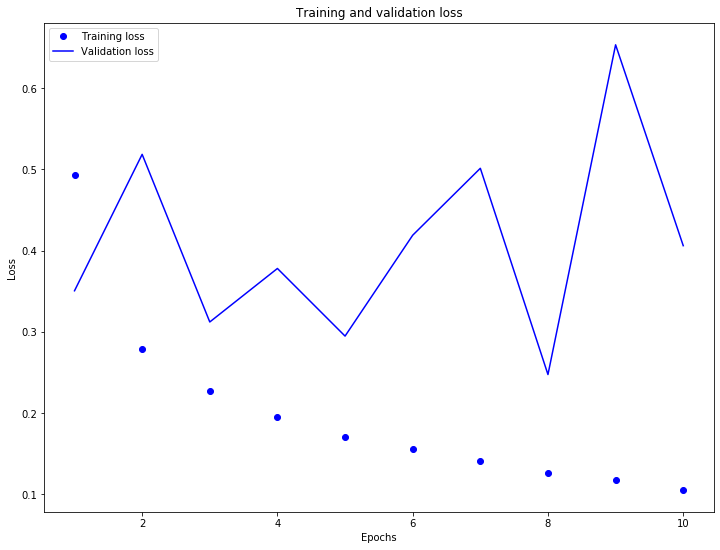

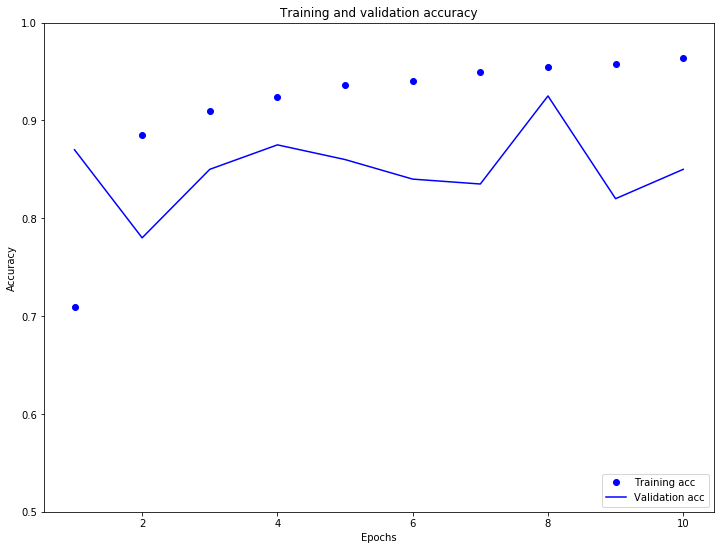

In [9]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()